In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
%pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

In [6]:
# Loading the data set for exploration

df = pd.read_excel(r"C:\Users\TRIPLE D.TECH\Downloads\Public_Transport_Trips_EDA.xlsx")
df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,NaN,F
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,NaN,F


### Checking the shape of the data


In [7]:
df.shape      # reveals that there are 1000 rows and 12 columns

(1000, 12)

In [8]:
# Gaining further understanding of the data

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   datetime64[ns]
 5   Passenger_Count        900 non-null    float64       
 6   Fare_Amount            900 non-null    float64       
 7   Trip_Duration_Minutes  900 non-null    float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
 10  Unnamed: 10            0 non-null      float64       
 11  Unnamed: 11            299 non-null    object        
dtypes: datetime64[ns](2), float64(4), object(6)
memory usage: 93.9+

#### Indicating the presence of misssing values, since RangeIndex is 1000 entries and there are some columns with 900 entries

#### Checking for Missing values

In [9]:
df.isnull().sum()

Trip_ID                     0
Mode_of_Transport           0
Departure_Station           0
Arrival_Station             0
Departure_Time              0
Passenger_Count           100
Fare_Amount               100
Trip_Duration_Minutes     100
Trip_Date                   0
Day_of_Week                 0
Unnamed: 10              1000
Unnamed: 11               701
dtype: int64

##### Insight: Reveals that there missing values in columns: [Passenger_Count, Fare_Amount, Trip_Duration_Minutes] and unnnamed columns in 10 & 11

In [10]:
# Confirming the presence of whitespace

mask = df.applymap(lambda x: isinstance(x, str) and x != x.strip())
df[mask.any(axis=1)]

C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_14508\2504256034.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: isinstance(x, str) and x != x.strip())


,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
9,TRIP0010,Ferry,Central,South Point,2024-01-01 06:09:00,86.0,47.778203,132.0,2024-01-01,Wednesday,NaN,F
35,TRIP0036,FERRY,Central,South Point,2024-01-01 06:35:00,85.0,44.488624,36.0,2024-01-02,Sunday,NaN,F
65,TRIP0066,bus,Central,Central,2024-01-01 07:05:00,19.0,0.689086,164.0,2024-01-03,Saturday,NaN,F
82,TRIP0083,train,Central,Downtown,2024-01-01 07:22:00,NaN,24.943795,63.0,2024-01-04,Wednesday,NaN,F
188,TRIP0189,Ferry,Central,South Point,2024-01-01 09:08:00,88.0,47.164854,NaN,2024-01-08,Wednesday,NaN,F
200,TRIP0201,fErry,Central,Downtown,2024-01-01 09:20:00,82.0,29.125771,168.0,2024-01-09,Tuesday,NaN,F
205,TRIP0206,fErry,Central,Airport,2024-01-01 09:25:00,37.0,NaN,36.0,2024-01-09,Thursday,NaN,F
217,TRIP0218,train,Central,Airport,2024-01-01 09:37:00,71.0,22.659835,136.0,2024-01-10,Wednesday,NaN,F
257,TRIP0258,Ferry,Central,South Point,2024-01-01 10:17:00,10.0,48.026712,70.0,2024-01-11,Monday,NaN,F
262,TRIP0263,BUS,Central,Downtown,2024-01-01 10:22:00,64.0,24.106555,NaN,2024-01-11,Sunday,NaN,F


# Data Cleaning 

##### Standardising text and do away with whitespaces

In [11]:
# Handling Whitespaces and standardising text over the entire data set

df = df.applymap(lambda x: x.strip().title() if isinstance(x, str) else x)


C:\Users\TRIPLE D.TECH\AppData\Local\Temp\ipykernel_14508\4012878855.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().title() if isinstance(x, str) else x)


In [12]:
# Confirming the end results of handling whitespaces and irregular text entry

df[mask.any(axis=1)]

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Unnamed: 10,Unnamed: 11
9,Trip0010,Ferry,Central,South Point,2024-01-01 06:09:00,86.0,47.778203,132.0,2024-01-01,Wednesday,NaN,F
35,Trip0036,Ferry,Central,South Point,2024-01-01 06:35:00,85.0,44.488624,36.0,2024-01-02,Sunday,NaN,F
65,Trip0066,Bus,Central,Central,2024-01-01 07:05:00,19.0,0.689086,164.0,2024-01-03,Saturday,NaN,F
82,Trip0083,Train,Central,Downtown,2024-01-01 07:22:00,NaN,24.943795,63.0,2024-01-04,Wednesday,NaN,F
188,Trip0189,Ferry,Central,South Point,2024-01-01 09:08:00,88.0,47.164854,NaN,2024-01-08,Wednesday,NaN,F
200,Trip0201,Ferry,Central,Downtown,2024-01-01 09:20:00,82.0,29.125771,168.0,2024-01-09,Tuesday,NaN,F
205,Trip0206,Ferry,Central,Airport,2024-01-01 09:25:00,37.0,NaN,36.0,2024-01-09,Thursday,NaN,F
217,Trip0218,Train,Central,Airport,2024-01-01 09:37:00,71.0,22.659835,136.0,2024-01-10,Wednesday,NaN,F
257,Trip0258,Ferry,Central,South Point,2024-01-01 10:17:00,10.0,48.026712,70.0,2024-01-11,Monday,NaN,F
262,Trip0263,Bus,Central,Downtown,2024-01-01 10:22:00,64.0,24.106555,NaN,2024-01-11,Sunday,NaN,F


##### Dropping Unnamed Columns

In [13]:
# Handling unnamed columns (i.e by dropping)

df= df.drop(columns=["Unnamed: 10", "Unnamed: 11"], errors="ignore")

df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,Trip0001,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,Trip0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday


##### Dropping irrelevant columns

In [14]:
df.drop('Trip_ID', axis=1, inplace= True)

In [15]:
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday


##### Handling Missing Values

In [16]:
# Handling missing values in the following columns: Passenger_Count,Fare_Amount, Trip_Duration_Minutes  

df['Passenger_Count']=df['Passenger_Count'].fillna(df['Passenger_Count'].mean())
df['Fare_Amount']=df['Fare_Amount'].fillna(df['Fare_Amount'].mean())
df['Trip_Duration_Minutes']=df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].mean())


df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Mode_of_Transport      1000 non-null   object        
 1   Departure_Station      1000 non-null   object        
 2   Arrival_Station        1000 non-null   object        
 3   Departure_Time         1000 non-null   datetime64[ns]
 4   Passenger_Count        1000 non-null   float64       
 5   Fare_Amount            1000 non-null   float64       
 6   Trip_Duration_Minutes  1000 non-null   float64       
 7   Trip_Date              1000 non-null   datetime64[ns]
 8   Day_of_Week            1000 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 70.4+ KB


Mode_of_Transport        0
Departure_Station        0
Arrival_Station          0
Departure_Time           0
Passenger_Count          0
Fare_Amount              0
Trip_Duration_Minutes    0
Trip_Date                0
Day_of_Week              0
dtype: int64

##### Insight: Data has been cleaned and standardised, doing away with missing values and white spaces, hence ready for data exploration

##### Visualizing missing values

In [17]:
!pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [18]:
import missingno as msn

<Axes: >

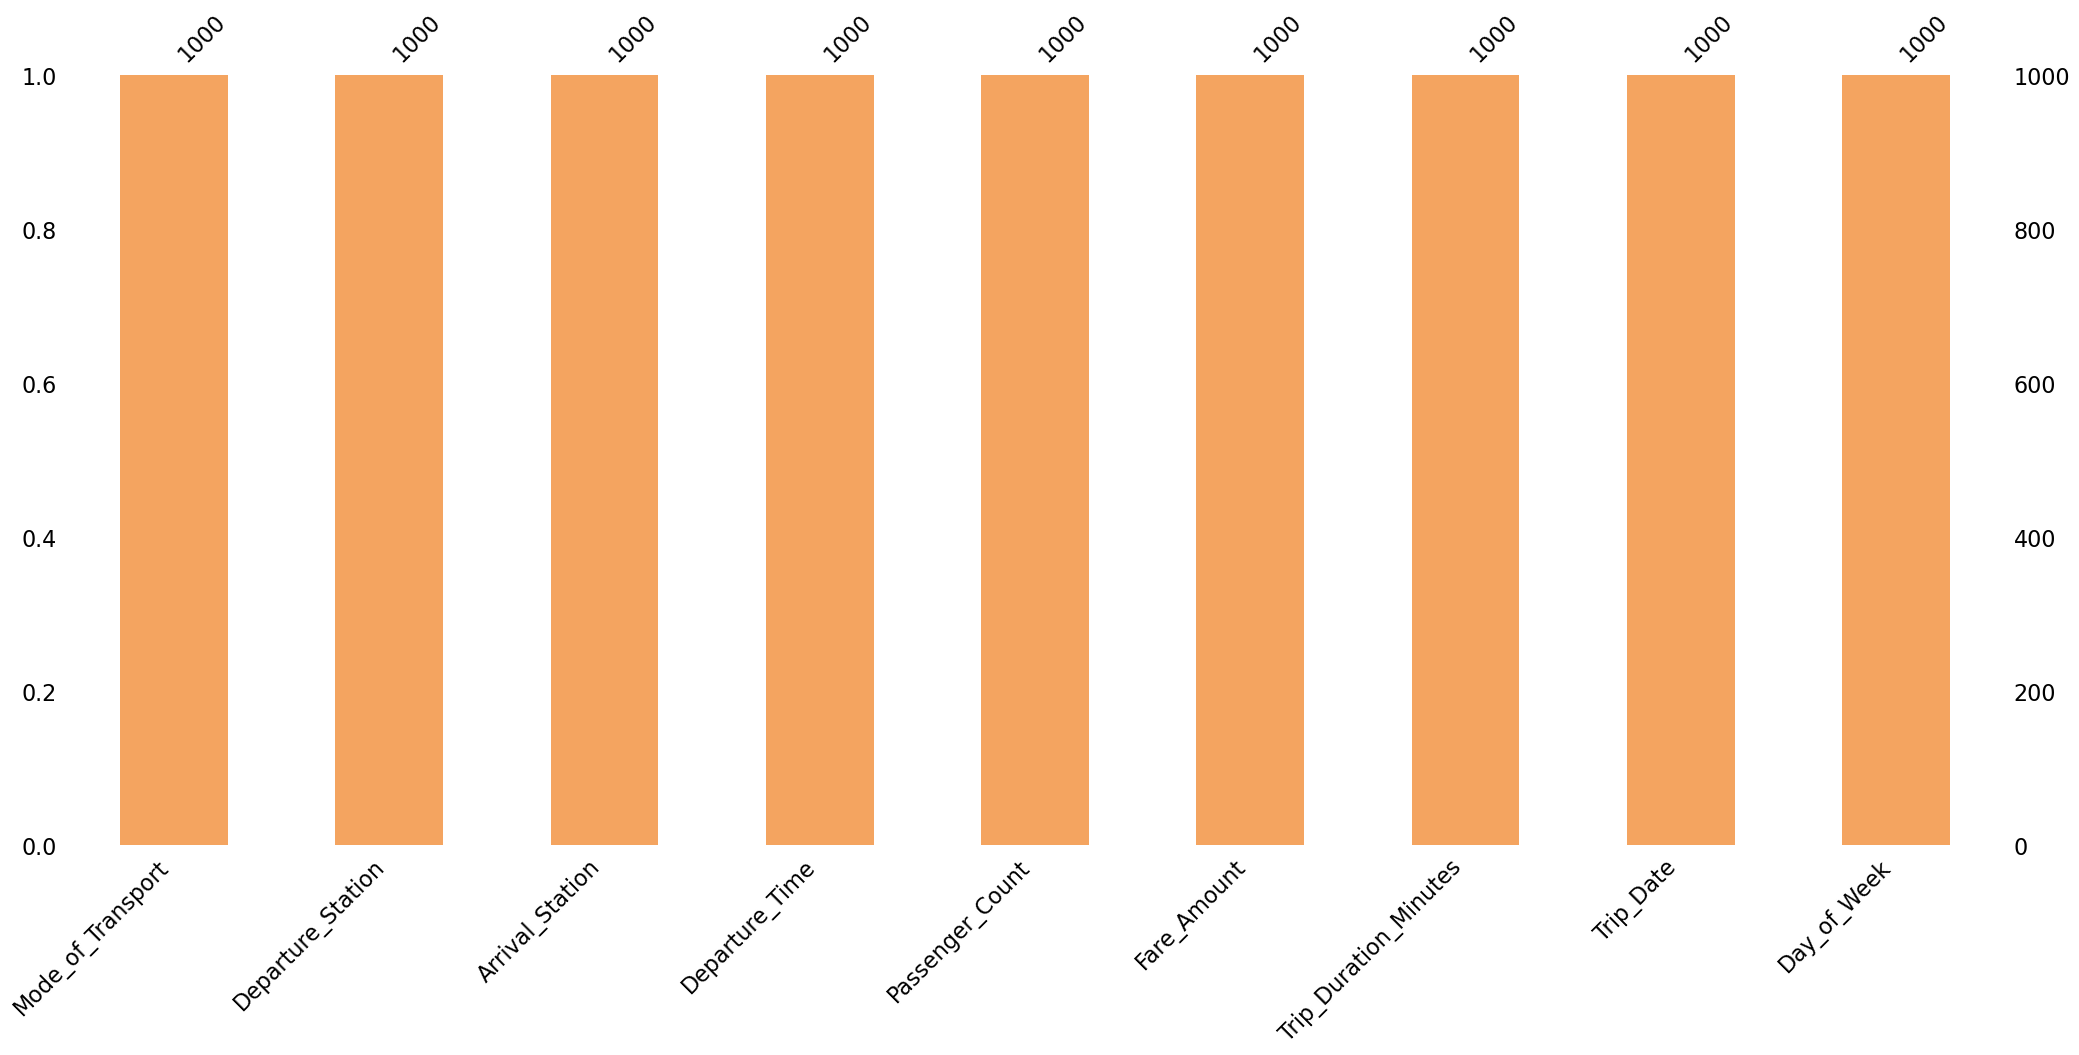

In [19]:
msn.bar(df, color='sandybrown')

<Axes: >

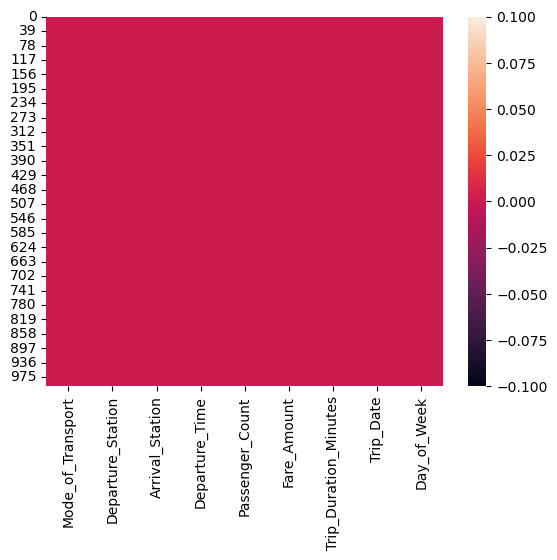

In [20]:
sns.heatmap(df.isnull())

##### INSIGHT: The above visualizations further confirm the absence of missing values

#### Confirming the presence of duplicates

In [21]:
df.duplicated().sum()

np.int64(0)

##### INSIGHT: There are no dupliactes in our data set. all good to go!

# Descriptive statistics


In [22]:
df.head(2)
df.describe()


,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date
count,1000,1000.000000,1000.000000,1000.000000,1000
mean,2024-01-01 14:19:30,49.154444,25.360742,94.270000,2024-01-21 08:03:50.400000
min,2024-01-01 06:00:00,1.000000,0.500576,5.000000,2024-01-01 00:00:00
25%,2024-01-01 10:09:45,28.000000,13.917364,55.000000,2024-01-11 00:00:00
50%,2024-01-01 14:19:30,49.154444,25.360742,94.270000,2024-01-21 00:00:00
75%,2024-01-01 18:29:15,70.000000,36.580122,132.250000,2024-02-01 00:00:00
max,2024-01-01 22:39:00,99.000000,49.945184,179.000000,2024-02-11 00:00:00
std,NaN,26.275424,13.721520,48.033891,NaN


##### Insight: The above information hints the absence of outliers, since the mean and median values are equal

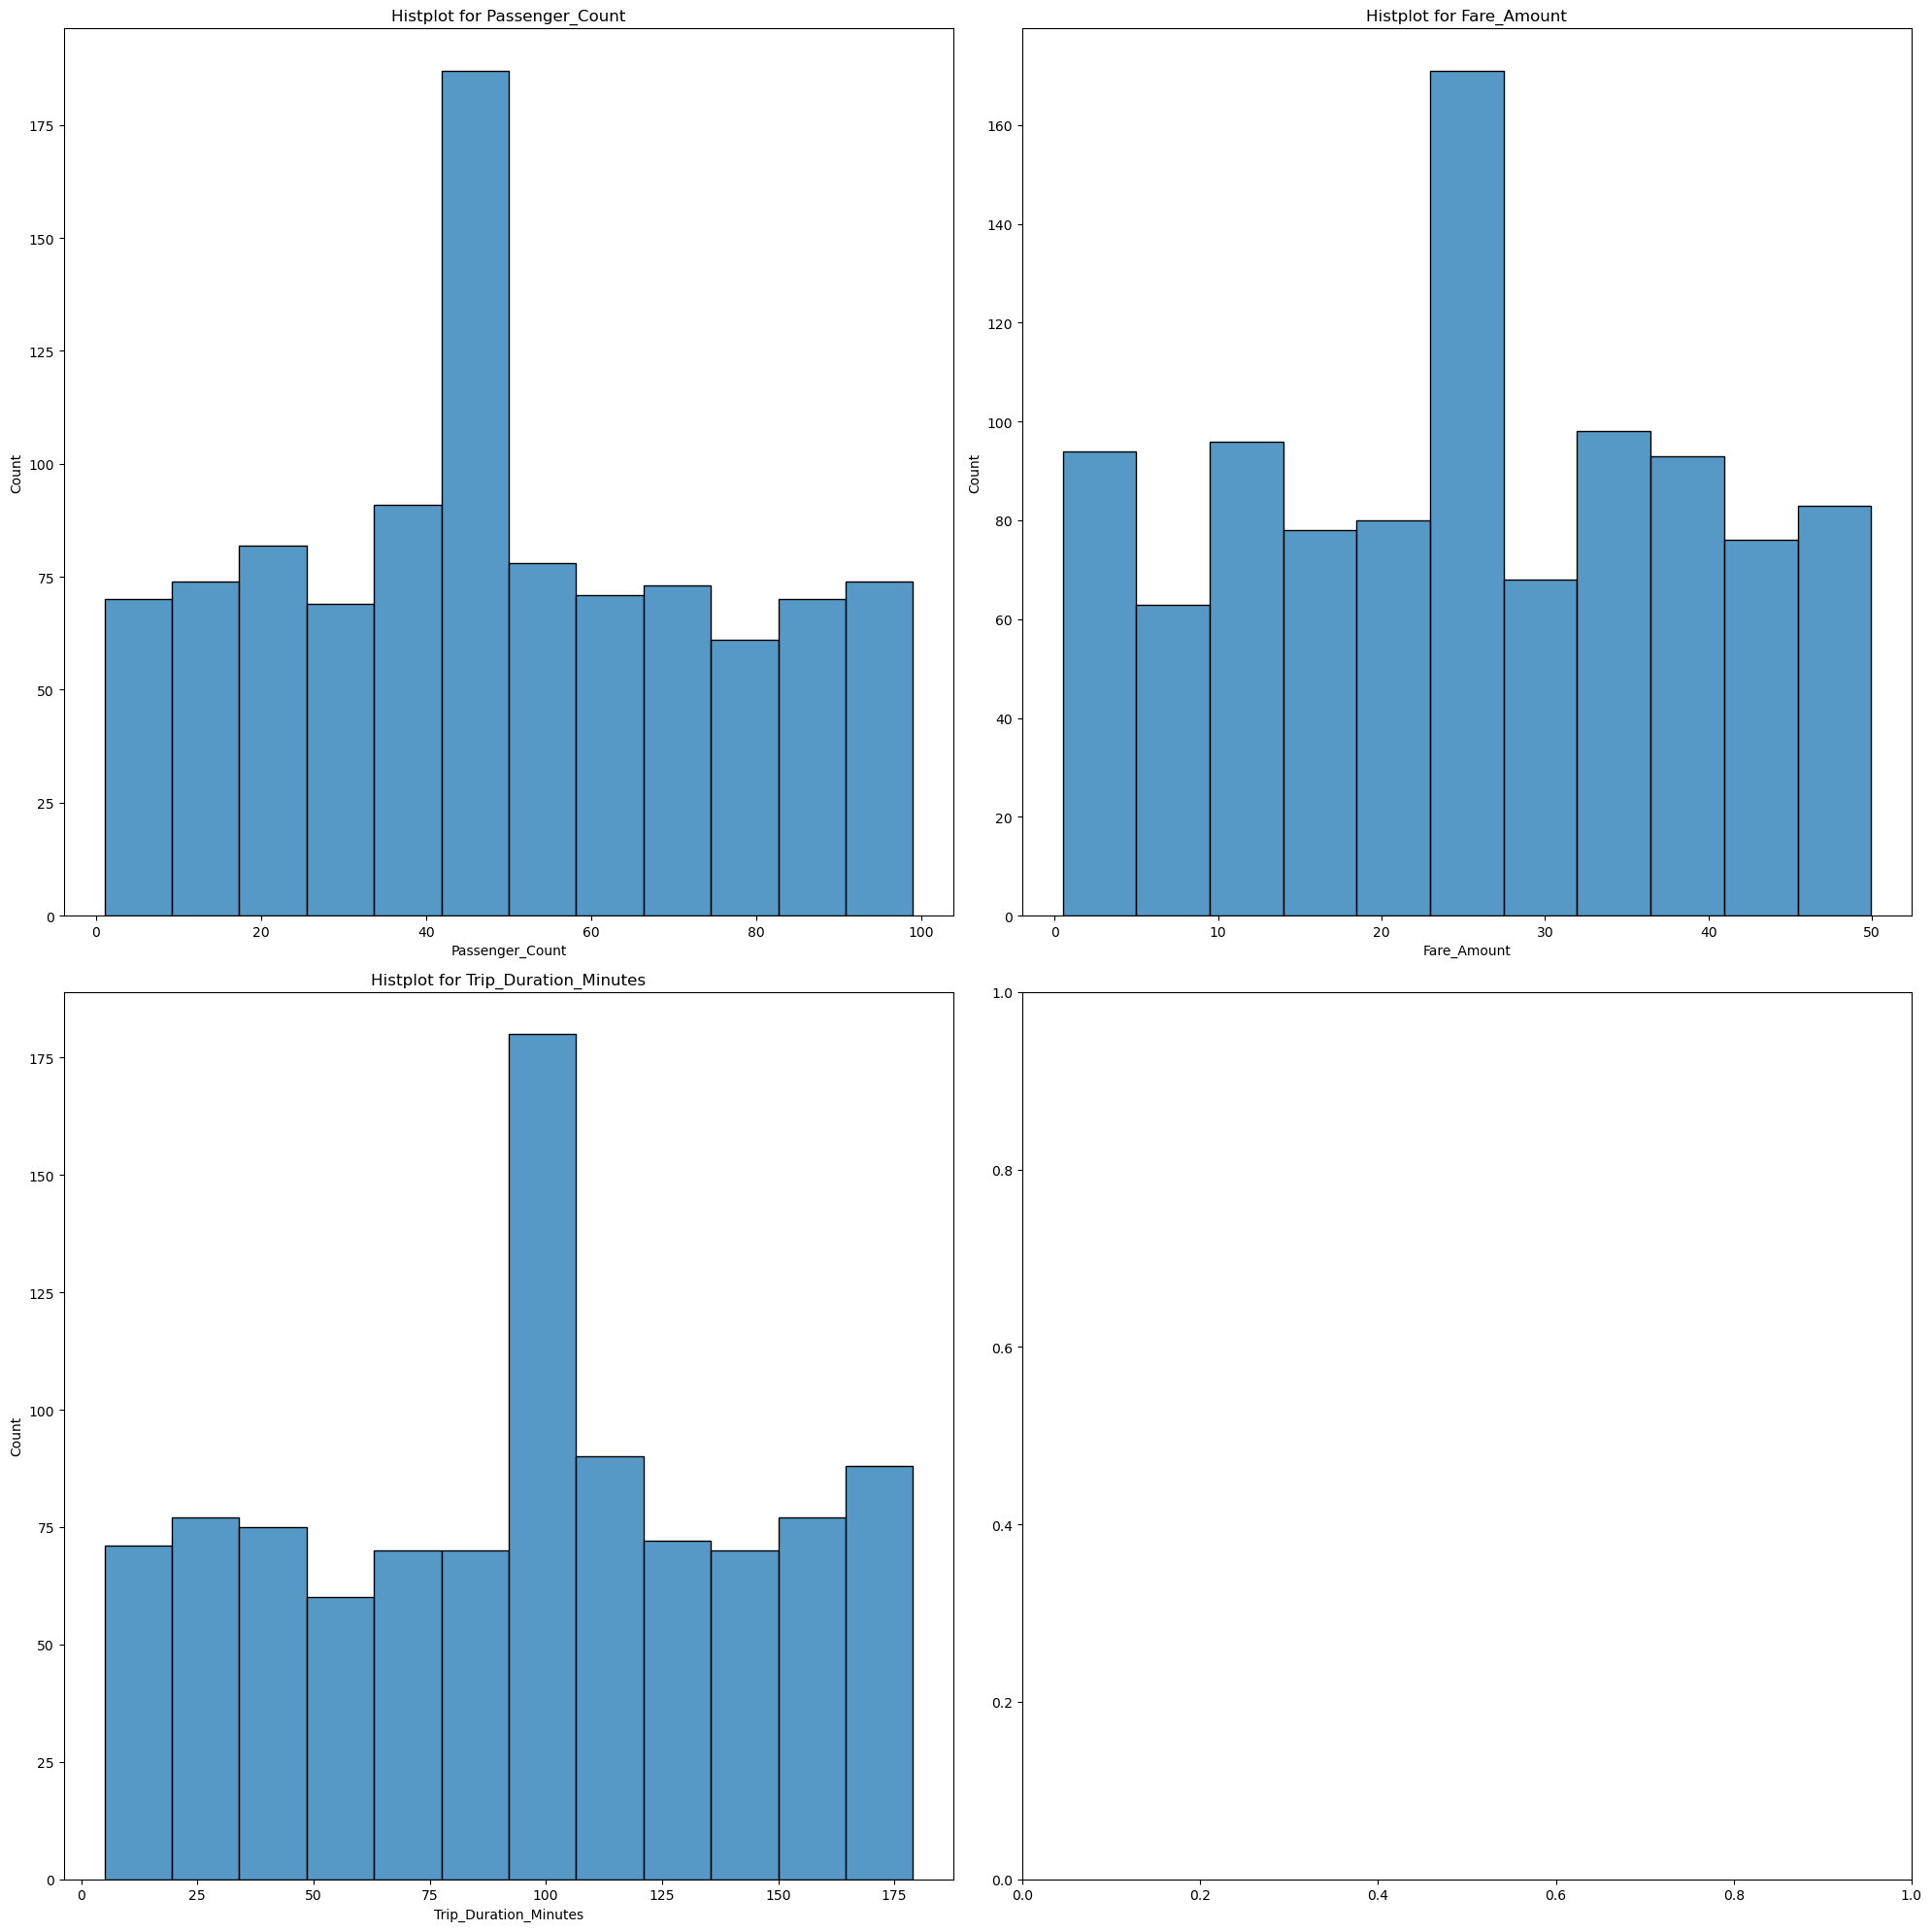

In [23]:
### Futher confirming the absence of outliers in our data set using the Histogram


numerical_cols = df.select_dtypes(include='number')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax=ax.flatten()

for idx, col in enumerate (numerical_cols):
    sns.histplot(df[col], ax=ax[idx])
    ax[idx].set_title(f"Histplot for {col}")

plt.tight_layout()
plt.show()

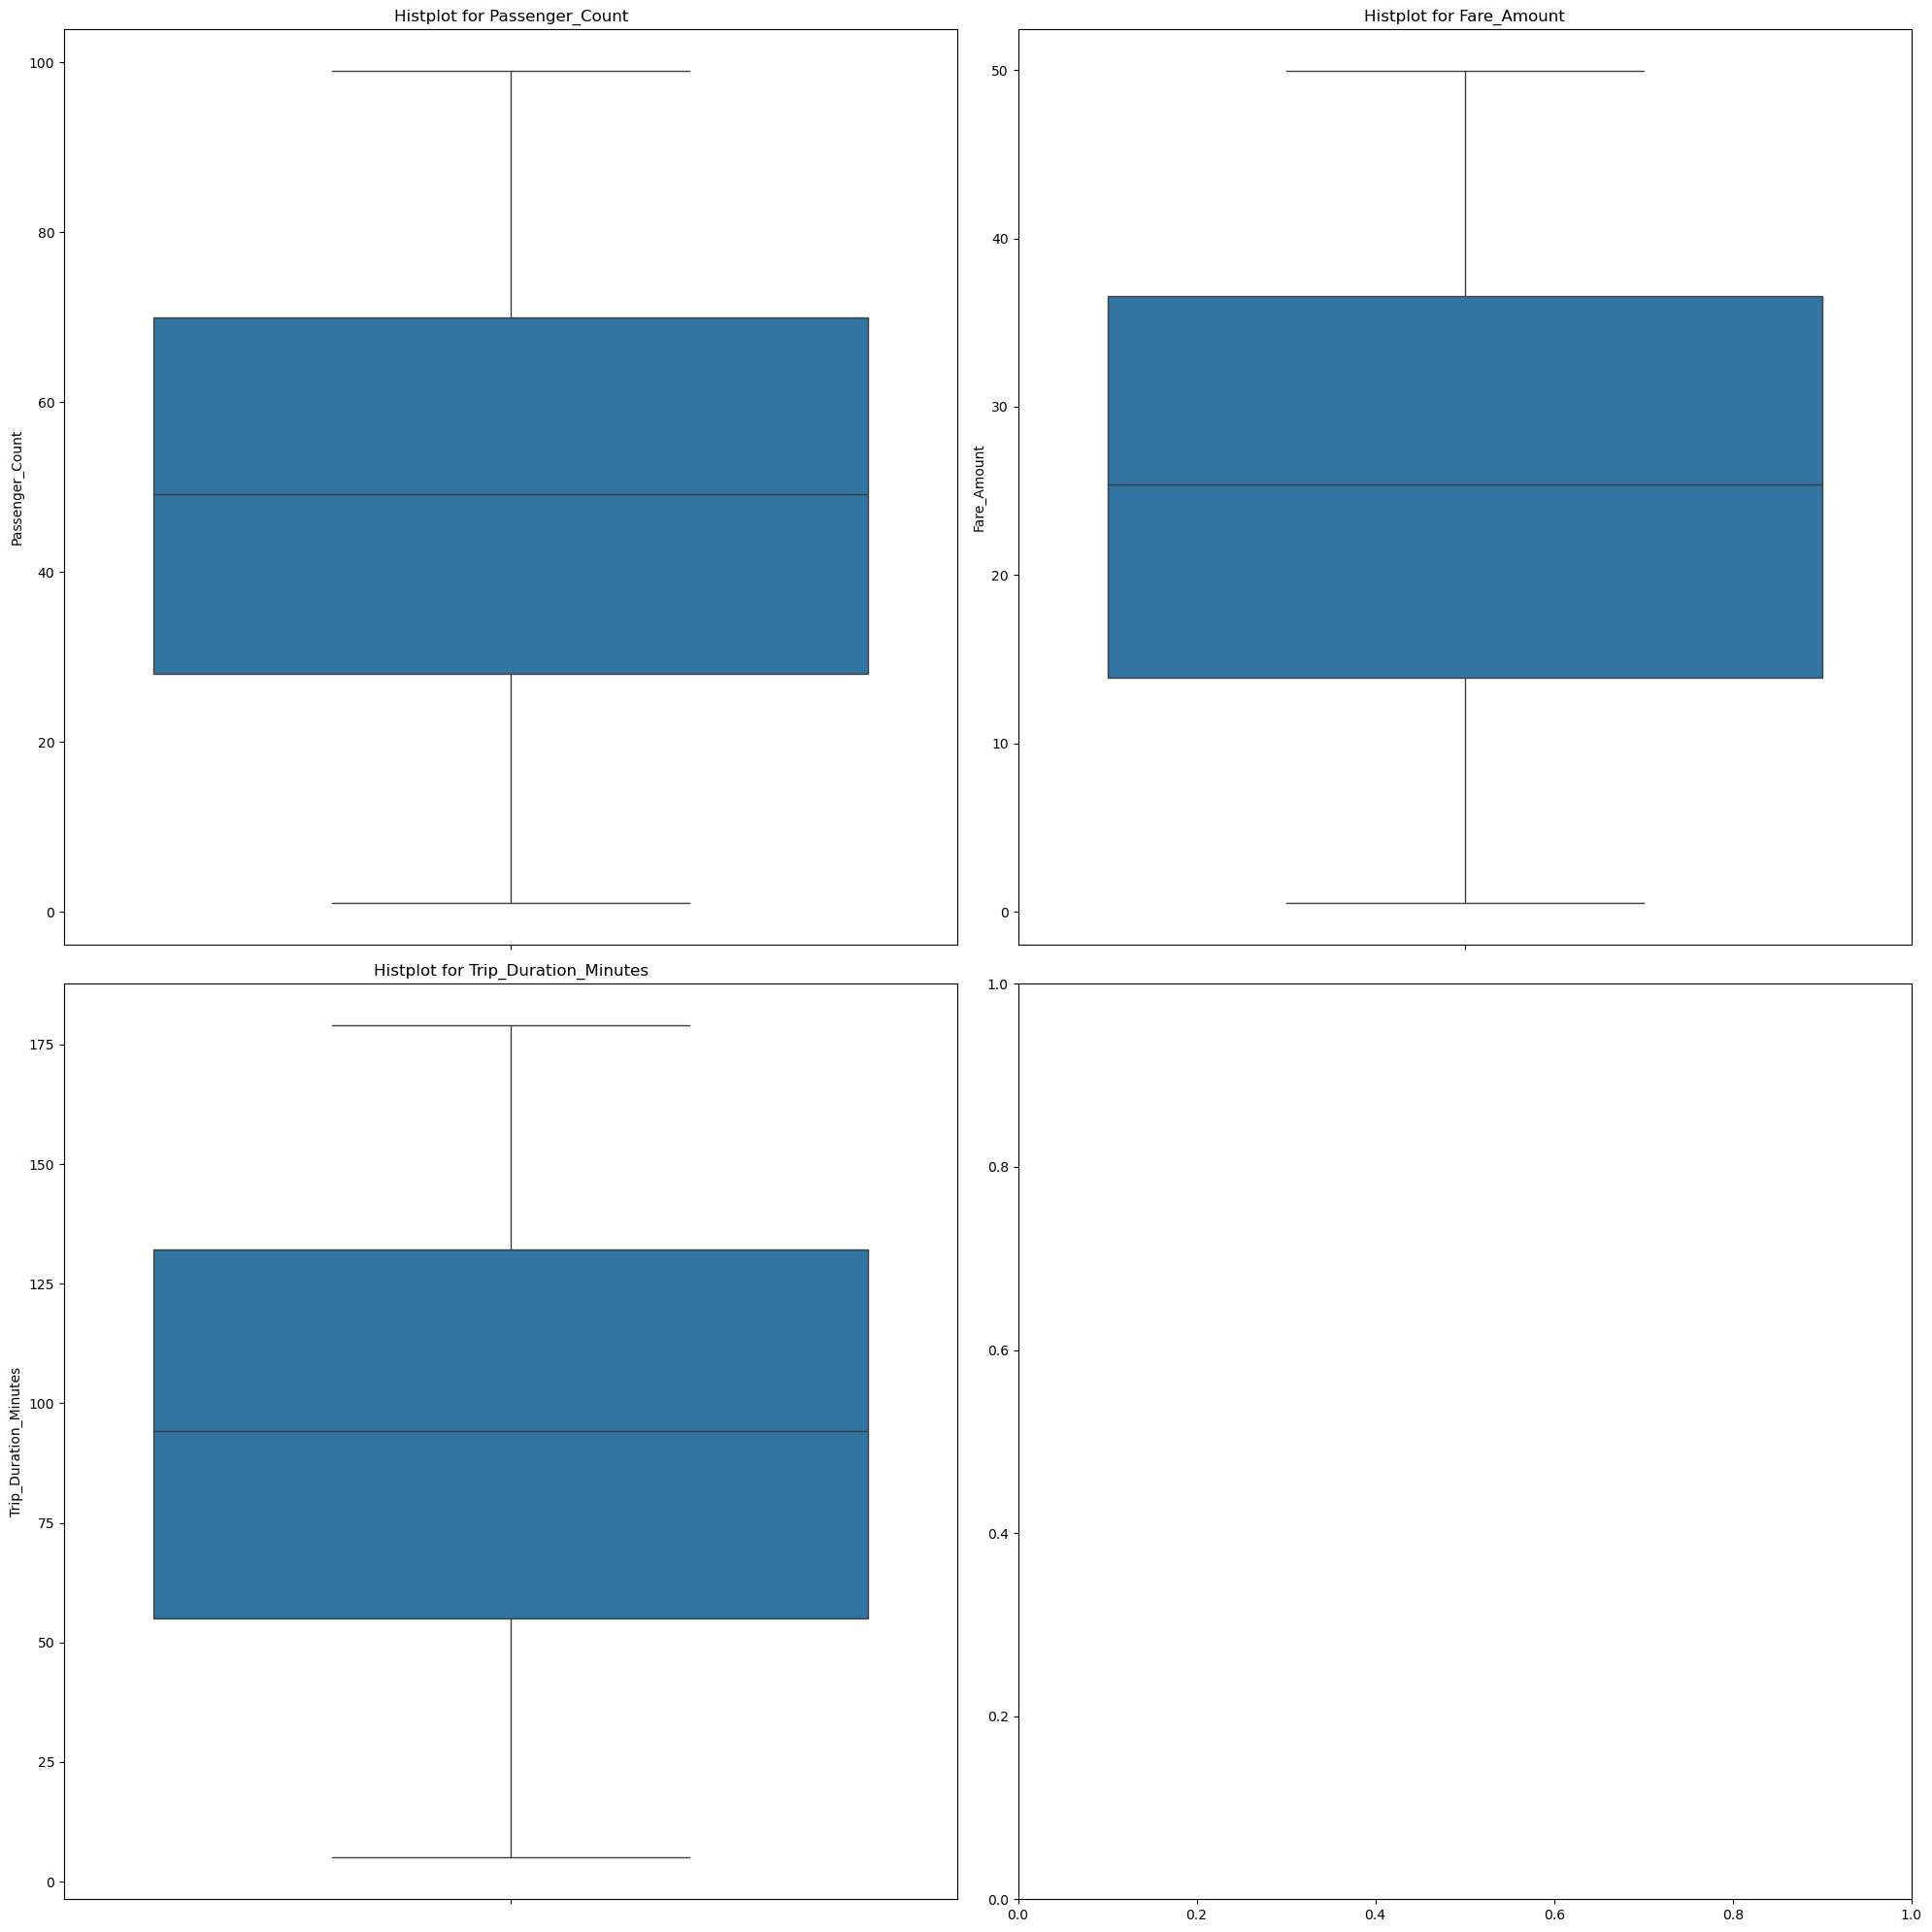

In [24]:
# Using the box plot to further confirm absence of outliers

numerical_cols = df.select_dtypes(include='number')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax=ax.flatten()

for idx, col in enumerate (numerical_cols):
    sns.boxplot(df[col], ax=ax[idx])
    ax[idx].set_title(f"Histplot for {col}")

plt.tight_layout()
plt.show()

##### Further attestation to the absence of outliers from these visualizations

# Data Exploration

In [25]:
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday


In [26]:
# Revealing which mode of transport is used by passengers

df.groupby("Mode_of_Transport")["Passenger_Count"].sum().sort_values(ascending=False)

Mode_of_Transport
Bus      16312.324444
Ferry    14332.861111
Train    11473.096667
Tram      7036.162222
Name: Passenger_Count, dtype: float64

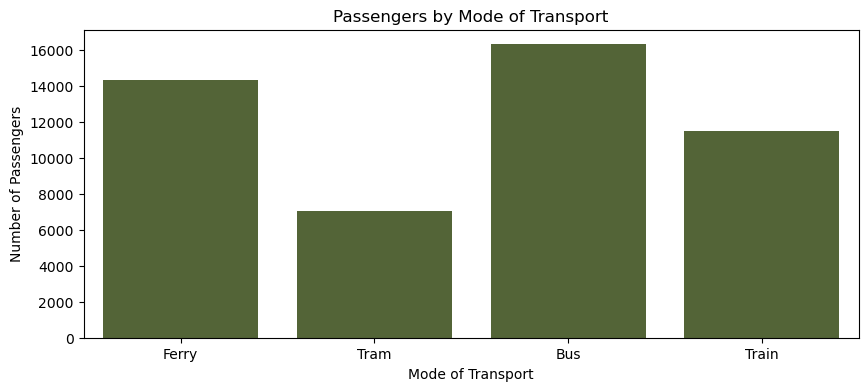

In [27]:
# Visualising the unique mode of transport available and the passenger count on each mode

df['Mode_of_Transport'].unique()

plt.figure(figsize=(10,4))
sns.barplot(data=df, x="Mode_of_Transport", y="Passenger_Count", estimator=sum, errorbar=None, color='darkolivegreen')
plt.xlabel("Mode of Transport")
plt.ylabel("Number of Passengers")
plt.title("Passengers by Mode of Transport")

plt.show()

##### INSIGHT: There is an overall higher usage of buses compared to the other mode of transport, and a lower use of Tram. 

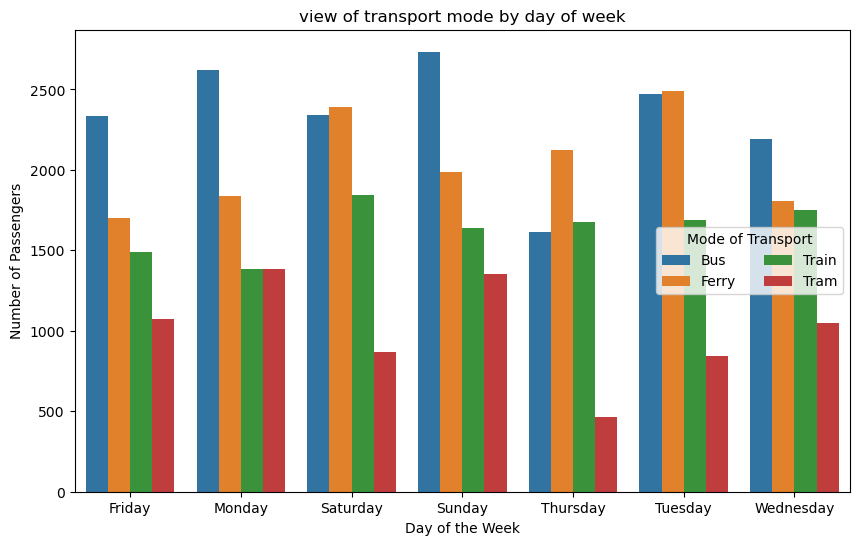

In [28]:
# Exploring the data to see if there is pattern with the day of week and mode of transport

Day_Trans = df.groupby(["Day_of_Week", "Mode_of_Transport"])["Passenger_Count"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=Day_Trans, x="Day_of_Week", y="Passenger_Count",hue="Mode_of_Transport" )
plt.xlabel("Day of the Week")
plt.ylabel("Number of Passengers")
plt.title("view of transport mode by day of week")
plt.legend(title="Mode of Transport", loc='center right', ncols=2)

plt.show()


##### INSIGHT: This further confirms the relatively higher usage of buses on almost every day of the week compared to other modes of transport, with Sunday peaking.

In [29]:
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday


In [30]:
# Exploring the most used route 


df["Route"] = df["Departure_Station"] + " → " + df["Arrival_Station"]    # Creating a new column to identify the various travel routes

df['Route'].value_counts()   # Shows descending of the different routes
df['Route'].nunique()  # reveals the number of unique of travel routes


36

In [31]:
df.head(2)


,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Route
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,West End → Airport
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,North Station → Downtown


In [32]:
df['Trip_Date'].unique()

<DatetimeArray>
['2024-01-01 00:00:00', '2024-01-02 00:00:00', '2024-01-03 00:00:00',
 '2024-01-04 00:00:00', '2024-01-05 00:00:00', '2024-01-06 00:00:00',
 '2024-01-07 00:00:00', '2024-01-08 00:00:00', '2024-01-09 00:00:00',
 '2024-01-10 00:00:00', '2024-01-11 00:00:00', '2024-01-12 00:00:00',
 '2024-01-13 00:00:00', '2024-01-14 00:00:00', '2024-01-15 00:00:00',
 '2024-01-16 00:00:00', '2024-01-17 00:00:00', '2024-01-18 00:00:00',
 '2024-01-19 00:00:00', '2024-01-20 00:00:00', '2024-01-21 00:00:00',
 '2024-01-22 00:00:00', '2024-01-23 00:00:00', '2024-01-24 00:00:00',
 '2024-01-25 00:00:00', '2024-01-26 00:00:00', '2024-01-27 00:00:00',
 '2024-01-28 00:00:00', '2024-01-29 00:00:00', '2024-01-30 00:00:00',
 '2024-01-31 00:00:00', '2024-02-01 00:00:00', '2024-02-02 00:00:00',
 '2024-02-03 00:00:00', '2024-02-04 00:00:00', '2024-02-05 00:00:00',
 '2024-02-06 00:00:00', '2024-02-07 00:00:00', '2024-02-08 00:00:00',
 '2024-02-09 00:00:00', '2024-02-10 00:00:00', '2024-02-11 00:00:00']
Leng

In [33]:
# exploring the most popular route overall

route_passengers = df.groupby(["Route"])["Passenger_Count"].sum().sort_values(ascending=False).head(5)

route_passengers.head(1)    # This reveals the most popular route overall.

Route
North Station → Airport    2152.772222
Name: Passenger_Count, dtype: float64

#### INSIGHT: Reveals that North Station → Airport is the most travelled route by passengers overall.

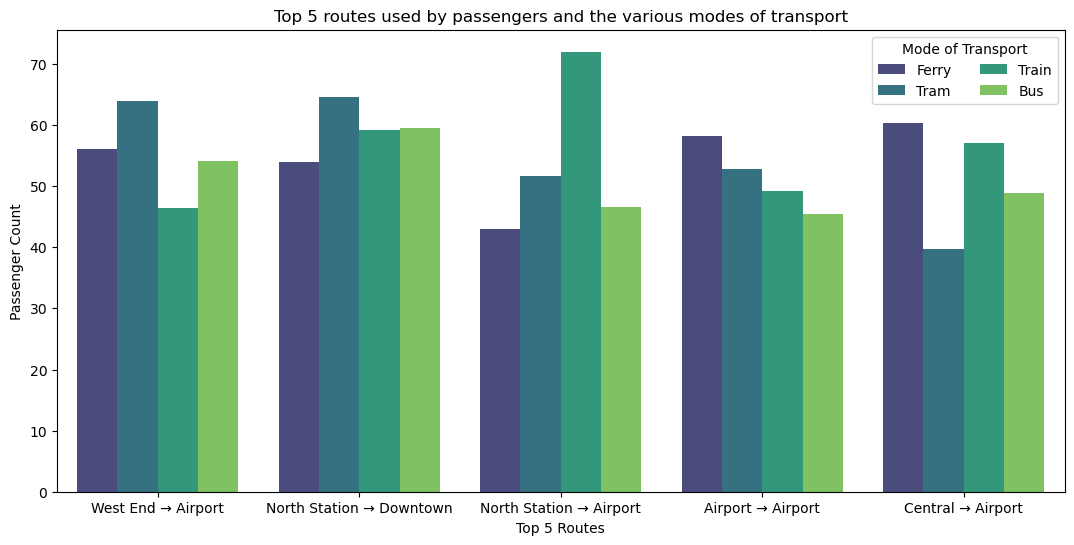

In [34]:
plt.figure(figsize=(13,6))

route_passengers = df.groupby("Route")["Passenger_Count"].sum().sort_values(ascending=False).head(5).index

top5_routes = df[df["Route"].isin(route_passengers)]
sns.barplot(data=top5_routes, x="Route", y="Passenger_Count", hue='Mode_of_Transport', palette="viridis", errorbar=None)
plt.title('Top 5 routes used by passengers and the various modes of transport')
plt.xlabel("Top 5 Routes")
plt.ylabel("Passenger Count")
plt.legend(title="Mode of Transport", loc='upper right', ncols=2)
plt.show()

##### INSIGHT: This visulization reveals that  North Station → Airport is the most travlled route, hence posing as a ho spot for maximizing revenue

In [35]:
# Which route carried the most passengers in a particular mode of transport

route_passengers = df.groupby(["Route", 'Mode_of_Transport'])["Passenger_Count"].sum().sort_values(ascending=False)
route_passengers.head(1)        # This reveals the most popular transport mode on a specific route.

Route                  Mode_of_Transport
South Point → Airport  Ferry                939.463333
Name: Passenger_Count, dtype: float64

##### INSIGHT: This reveals that South Point → Airport recorded the route with the highest number of passengers onboard the mode of transport.

In [36]:
# Date Time series analysis on passenger count

df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Route
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,West End → Airport
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,North Station → Downtown


In [37]:
df["Year_Month"]= df["Trip_Date"].dt.to_period("M").astype(str)
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Route,Year_Month
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,West End → Airport,2024-01
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,North Station → Downtown,2024-01


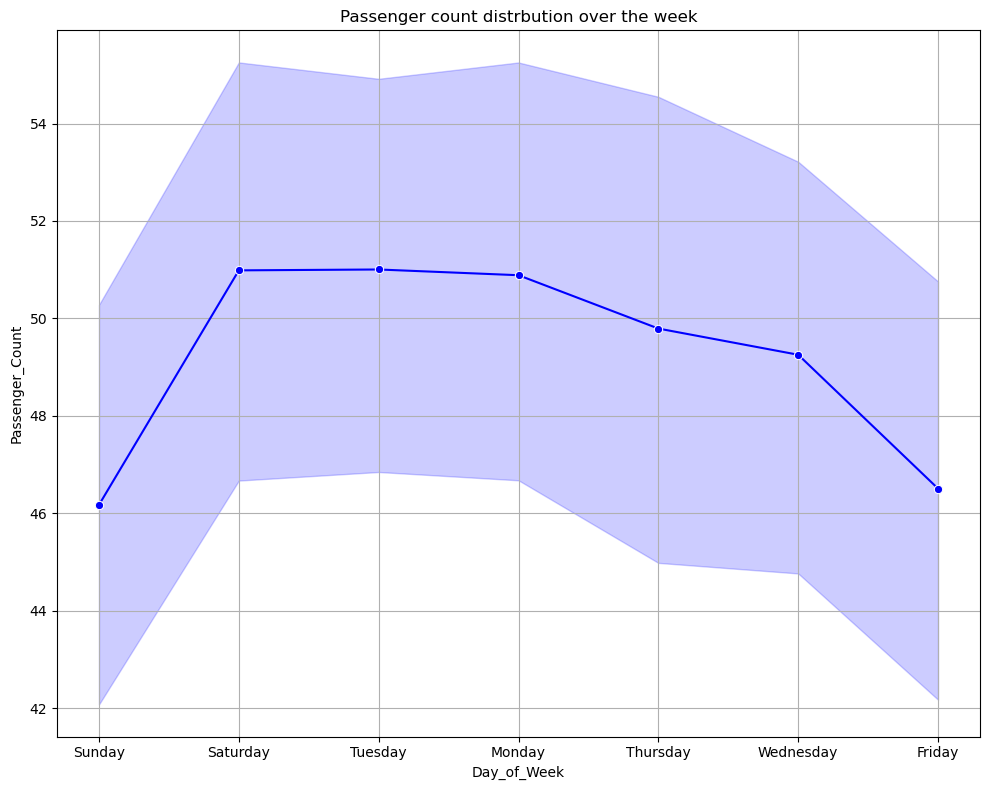

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.lineplot(x=df["Day_of_Week"], y=df["Passenger_Count"], color="blue", marker='o')
plt.title("Passenger count distrbution over the week")
plt.xlabel("Day_of_Week")
plt.ylabel("Passenger_Count")      
plt.grid(True)
plt.tight_layout()
plt.show()

#### INSIGHT: Saturday and Tuesday recorded the highest passenger counts

In [39]:
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Route,Year_Month
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,West End → Airport,2024-01
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,North Station → Downtown,2024-01


#### Correlations between variables

In [40]:
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Route,Year_Month
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,West End → Airport,2024-01
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,North Station → Downtown,2024-01


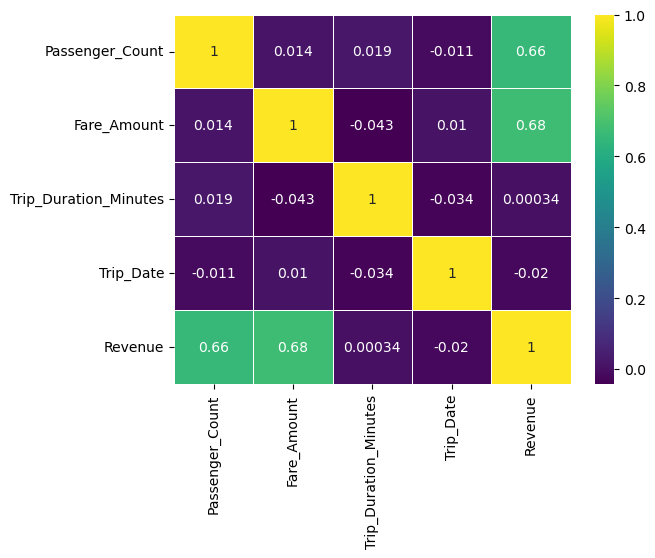

In [42]:
# Confirming correlations key variables
df['Revenue']=df['Fare_Amount']*df['Passenger_Count']
df_select = df[['Passenger_Count', 'Fare_Amount', 'Trip_Duration_Minutes','Trip_Date', 'Revenue']]
corr= df_select.corr()
sns.heatmap(corr, annot=True, cmap="viridis", linewidths=0.5);

##### INSIGHT: There appears to be no correlation between these varibles, thus, trip duration for instance has an insignificant bearing on the passenger count. However, there is a strong positive correlation between revenue and passenger count, and fare amount against revenue.

In [43]:
df.head(2)

,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,Route,Year_Month,Revenue
0,Ferry,West End,Airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,West End → Airport,2024-01,91.216483
1,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,North Station → Downtown,2024-01,950.975482


#### Revenue Analysis

In [44]:
df["Revenue"] = df["Fare_Amount"] * df["Passenger_Count"]

In [45]:
revenue_by_mode = df.groupby("Mode_of_Transport")["Revenue"].sum().reset_index()

In [46]:
revenue_by_mode

,Mode_of_Transport,Revenue
0,Bus,411738.069875
1,Ferry,357595.327991
2,Train,307620.824665
3,Tram,174616.302206


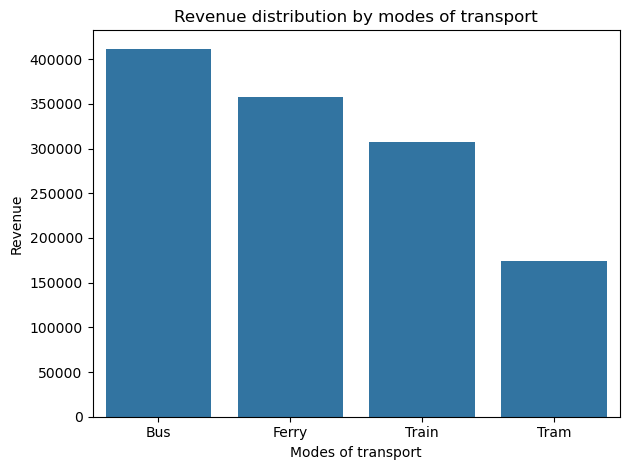

In [47]:
 
sns.barplot(data=revenue_by_mode, x="Mode_of_Transport", y="Revenue", errorbar=None)
plt.title('Revenue distribution by modes of transport')
plt.xlabel("Modes of transport")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

In [48]:
df['Mode_of_Transport'].unique()

array(['Ferry', 'Tram', 'Bus', 'Train'], dtype=object)

# Key Highlights: 
1. Buses were discovered to be the most used form of transportation, whereas trams and Ferries were discovered to be the mode of transport with the highest carriage capacity(i.e has a higher passenger count).
2. The North Station → Airport route was the most travelled route
3. Saturday, Tuesday and Monday recorded the highest passenger counts
4. Buses generate the most revenue
   
# Recommendations:
1. To optimise usage of transport modes and generate more revenue, larger vehicles should be used on hotspot routes (i.e most travelled routes), whereas smaller vehicles or less number of transport modes be deployed to routes with fewer activities. This helps optimise revenue while curbing unneccesary cost. 
2. With the peak days of the week with higher passenger counts: Saturday, Tuesday and Monday, an optimised scheduling of transport modes could greatly reduce passenger wait times, and also reduce overcrowding, thereby improving customer experiences overall. Also the deploying of lesser modes of transport on less busy days ( Wednesday, thursday, friday and Sunday), could help cut cost.

In [ ]:
%pip freeze > requirements.txt